In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16


In [2]:
SIZE = 224 #Resize images

In [11]:
print(os.listdir("Rice data/"))

['train', 'val']


In [13]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("D:/Rice data//train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Bacterial leaf blight
D:/Rice data//train\Bacterial leaf blight\1.JPG
D:/Rice data//train\Bacterial leaf blight\10.JPG
D:/Rice data//train\Bacterial leaf blight\11.JPG
D:/Rice data//train\Bacterial leaf blight\12.JPG
D:/Rice data//train\Bacterial leaf blight\13.JPG
D:/Rice data//train\Bacterial leaf blight\14.JPG
D:/Rice data//train\Bacterial leaf blight\15.JPG
D:/Rice data//train\Bacterial leaf blight\16.JPG
D:/Rice data//train\Bacterial leaf blight\17.JPG
D:/Rice data//train\Bacterial leaf blight\18.jpg
D:/Rice data//train\Bacterial leaf blight\19.JPG
D:/Rice data//train\Bacterial leaf blight\2.jpg
D:/Rice data//train\Bacterial leaf blight\20.JPG
D:/Rice data//train\Bacterial leaf blight\21.JPG
D:/Rice data//train\Bacterial leaf blight\22.JPG
D:/Rice data//train\Bacterial leaf blight\23.JPG
D:/Rice data//train\Bacterial leaf blight\24.JPG
D:/Rice data//train\Bacterial leaf blight\25.jpg
D:/Rice data//train\Bacterial leaf blight\3.JPG
D:/Rice data//train\Bacterial leaf blight\4.jpg
D:

In [14]:
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("D:Rice data/val/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [15]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [16]:
train_images.shape

(100, 224, 224, 3)

In [6]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("D:/St.Anns/RESEARCH WORK/Work in Progress/3. Grape by Snehit/Grape dataset/Val\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [17]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [18]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [19]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [20]:
x_train.shape

(100, 224, 224, 3)

In [21]:
x_test.shape

(35, 224, 224, 3)

In [22]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [24]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

In [25]:
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
#Now, let us extract features using VGG16
#Train features

import datetime
start = datetime.datetime.now()
train_feature_extractor=VGG_model.predict(x_train)
print("Train features",train_feature_extractor.shape)

end = datetime.datetime.now()
print("Total execution time : ", end-start)

4/4 [==============================] - 7s 1s/step
Train features (100, 7, 7, 512)
Total execution time :  0:00:06.846484


In [27]:
import datetime
start = datetime.datetime.now()

train_features = train_feature_extractor.reshape(train_feature_extractor.shape[0], -1)
print("Train features",train_features.shape)

end = datetime.datetime.now()
print("Total execution time : ", end-start)

Train features (100, 25088)
Total execution time :  0:00:00


In [28]:
type(train_features)

numpy.ndarray

In [29]:
# Convert array to data frame
import pandas as pd
x_train_new = pd.DataFrame(train_features)

In [30]:
x_train_new.shape

(100, 25088)

In [31]:
x_test.shape

(35, 224, 224, 3)

In [32]:
#Now, let us extract features using VGG16
#Train features

import datetime
start = datetime.datetime.now()
test_feature_extractor=VGG_model.predict(x_test)
print("Test features",test_feature_extractor.shape)

end = datetime.datetime.now()
print("Total execution time : ", end-start)

2/2 [==============================] - 2s 208ms/step
Test features (35, 7, 7, 512)
Total execution time :  0:00:02.369859


In [33]:
import datetime
start = datetime.datetime.now()
#test features
test_feature_extractor=VGG_model.predict(x_test)
test_features = test_feature_extractor.reshape(test_feature_extractor.shape[0], -1)

end = datetime.datetime.now()
print("Total execution time : ", end-start)

2/2 [==============================] - 2s 211ms/step
Total execution time :  0:00:02.387853


In [34]:
type(test_features)

numpy.ndarray

In [35]:
test_features.shape

(35, 25088)

In [36]:
# Create the dataframe
x_test_new = pd.DataFrame(test_features)

In [37]:
x_test_new.shape

(35, 25088)

# 1- Extra Trees Classifier (ETC)

In [38]:
x_train_new.shape, y_train.shape

((100, 25088), (100,))

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
import datetime
start = datetime.datetime.now()
etc.fit(x_train_new, y_train) #For sklearn no one hot encoding
end = datetime.datetime.now()
print("Total execution time: ", end-start)

Total execution time:  0:00:00.248287


In [ ]:
#Send test data through same feature extractor process
#X_test_feature = VGG_model.predict(x_test)
#X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [40]:
#Now predict using the trained ML model. 
prediction = etc.predict(x_train_new)

#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

In [41]:
#Print overall accuracy
from sklearn import metrics
print ("Train Accuracy = ", metrics.accuracy_score(train_labels, prediction))

Train Accuracy =  1.0


In [42]:
x_test_new.shape

(35, 25088)

In [43]:
#Now predict using the trained ML model. 
x_test_pred1 = etc.predict(x_test_new)

#Inverse le transform to get original label back. 
x_test_pred1 = le.inverse_transform(x_test_pred1)

In [44]:
x_test_pred1.shape

(35,)

In [45]:
#Print overall accuracy
from sklearn import metrics
print ("Test Accuracy of ETC= ", metrics.accuracy_score(test_labels, x_test_pred1)*100)

Test Accuracy of ETC=  60.0


In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(classification_report(test_labels, x_test_pred1,digits=4))

                       precision    recall  f1-score   support

Bacterial leaf blight     0.7143    1.0000    0.8333        15
           Brown spot     0.4000    0.4000    0.4000        10
            Leaf smut     0.5000    0.2000    0.2857        10

             accuracy                         0.6000        35
            macro avg     0.5381    0.5333    0.5063        35
         weighted avg     0.5633    0.6000    0.5531        35



In [48]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

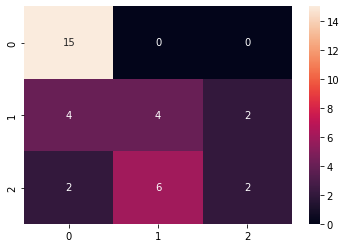

In [49]:
cm = confusion_matrix(test_labels, x_test_pred1)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 4  4  2]
 [ 2  6  2]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\2091262958.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

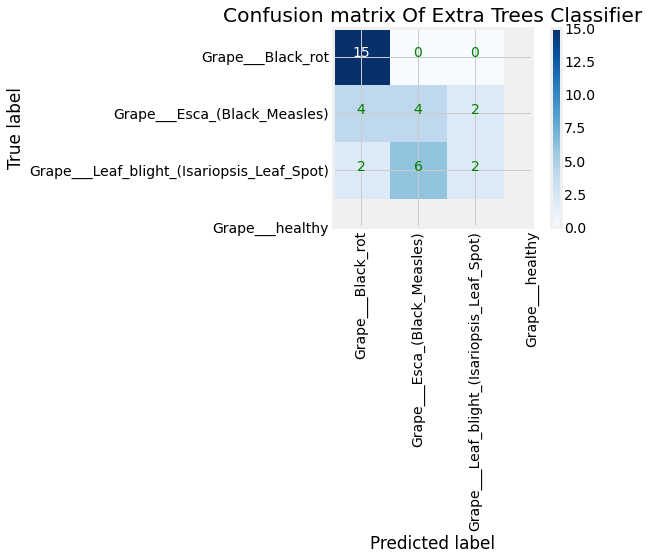

In [50]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred1)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of Extra Trees Classifier')

1/1 [==============================] - 0s 88ms/step
The prediction for this image is:  ['Brown spot']
The actual label for this image is:  Brown spot


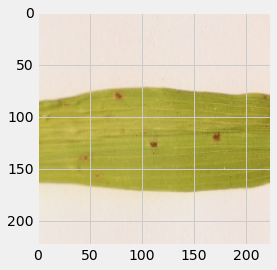

In [51]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = etc.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

# 2- Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=123,n_jobs=-1)
RFC.fit(x_train_new, y_train)

RandomForestClassifier(n_jobs=-1, random_state=123)

In [53]:
#Now predict using the trained ML model. 
x_test_pred2 = RFC.predict(x_test_new)

#Inverse le transform to get original label back. 
x_test_pred2 = le.inverse_transform(x_test_pred2)

In [54]:
#Print overall accuracy
from sklearn import metrics
print ("Test Accuracy of RFC= ", metrics.accuracy_score(test_labels, x_test_pred2)*100)

Test Accuracy of RFC=  60.0


In [55]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(test_labels, x_test_pred2,digits=4))

                       precision    recall  f1-score   support

Bacterial leaf blight     0.7895    1.0000    0.8824        15
           Brown spot     0.4167    0.5000    0.4545        10
            Leaf smut     0.2500    0.1000    0.1429        10

             accuracy                         0.6000        35
            macro avg     0.4854    0.5333    0.4933        35
         weighted avg     0.5288    0.6000    0.5488        35



<AxesSubplot:>

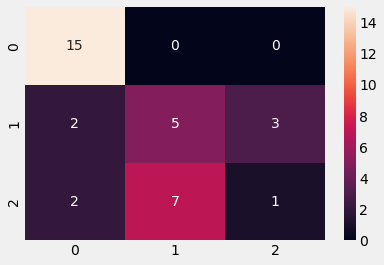

In [56]:
cm = confusion_matrix(test_labels,x_test_pred2)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 2  5  3]
 [ 2  7  1]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\574681131.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

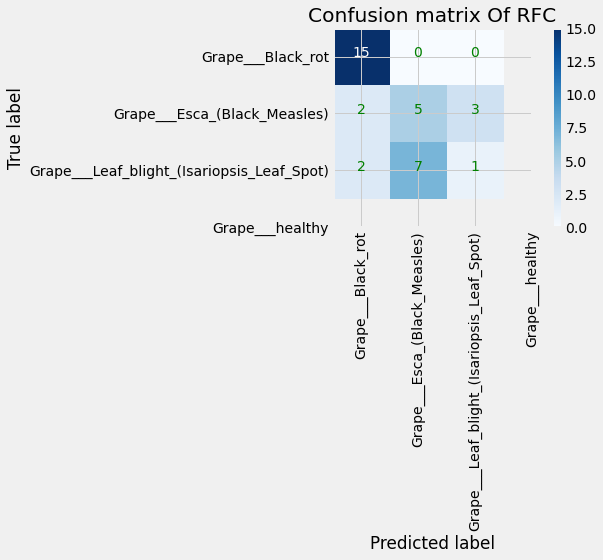

In [57]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred2)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of RFC')

1/1 [==============================] - 0s 83ms/step
The prediction for this image is:  ['Brown spot']
The actual label for this image is:  Leaf smut


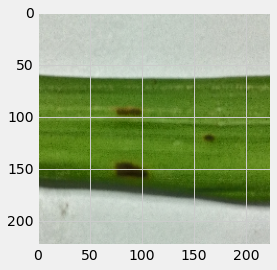

In [58]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = RFC.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

# 3- Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=123)
DTC.fit(x_train_new, y_train)

DecisionTreeClassifier(random_state=123)

In [60]:
#Now predict using the trained ML model. 
x_test_pred3 = DTC.predict(x_test_new)

#Inverse le transform to get original label back. 
x_test_pred3 = le.inverse_transform(x_test_pred3)

In [61]:
#Print overall accuracy
from sklearn import metrics
print ("Test Accuracy of DTC = ", metrics.accuracy_score(test_labels, x_test_pred3)*100)

Test Accuracy of DTC =  71.42857142857143


In [62]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(test_labels, x_test_pred3,digits=4))

                       precision    recall  f1-score   support

Bacterial leaf blight     0.8824    1.0000    0.9375        15
           Brown spot     0.5714    0.4000    0.4706        10
            Leaf smut     0.5455    0.6000    0.5714        10

             accuracy                         0.7143        35
            macro avg     0.6664    0.6667    0.6598        35
         weighted avg     0.6973    0.7143    0.6995        35



<AxesSubplot:>

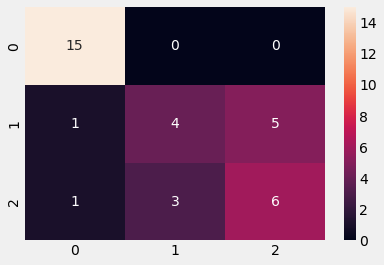

In [63]:
cm = confusion_matrix(test_labels, x_test_pred3)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 1  4  5]
 [ 1  3  6]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\1370622012.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

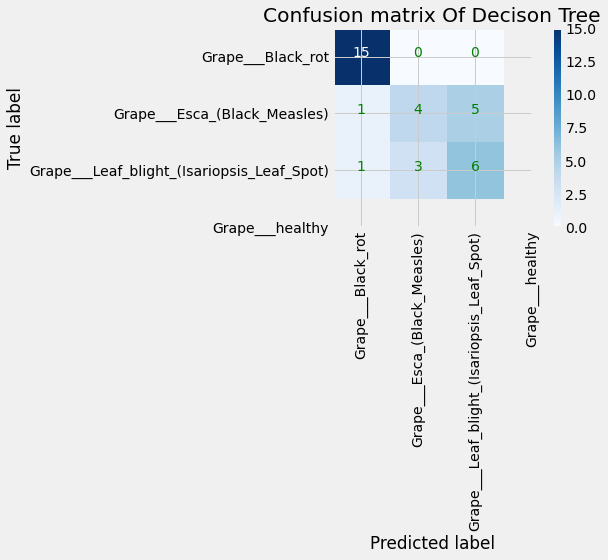

In [64]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred3)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of Decison Tree')

1/1 [==============================] - 0s 81ms/step
The prediction for this image is:  ['Bacterial leaf blight']
The actual label for this image is:  Bacterial leaf blight


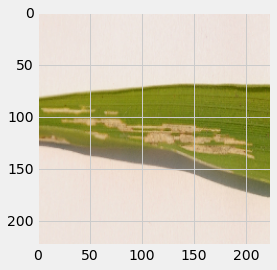

In [65]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = DTC.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

# 4-Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression


In [67]:
import datetime
start = datetime.datetime.now()
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_1= LogisticRegression(C= 0.01, max_iter= 100, penalty= 'l2', solver= 'liblinear')
# Train the model on training data
LR_1.fit(x_train_new, y_train) #For sklearn no one hot encoding

end = datetime.datetime.now()
print("Total execution time: ", end-start)

Total execution time:  0:00:02.742550


In [68]:
#Now predict using the trained Logistic Regression model. 
prediction_LR11 = LR_1.predict(x_train_new)
#Inverse le transform to get original label back. 
prediction_LR11= le.inverse_transform(prediction_LR11)
print("prediction of train shape is:",prediction_LR11.shape)

prediction of train shape is: (100,)


In [69]:
#Now predict using the trained Logistic Regression model. 
prediction_LR1 = LR_1.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_LR1= le.inverse_transform(prediction_LR1)
print("prediction of test shape is:",prediction_LR1.shape)

prediction of test shape is: (35,)


In [118]:
#Now predict using the trained ML model. 
x_test_pred4 = LR_1.predict(x_test_new)

#Inverse le transform to get original label back. 
x_test_pred4 = le.inverse_transform(x_test_pred4)

In [119]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(test_labels, x_test_pred4,digits=4))

                       precision    recall  f1-score   support

Bacterial leaf blight     0.7143    1.0000    0.8333        15
           Brown spot     0.5556    0.5000    0.5263        10
            Leaf smut     0.6000    0.3000    0.4000        10

             accuracy                         0.6571        35
            macro avg     0.6233    0.6000    0.5865        35
         weighted avg     0.6363    0.6571    0.6218        35



In [120]:
#Print overall accuracy
from sklearn import metrics
print ("Test Accuracy of Logistic Regression = ", metrics.accuracy_score(test_labels, x_test_pred4)*100)

Test Accuracy of Logistic Regression =  65.71428571428571


<AxesSubplot:>

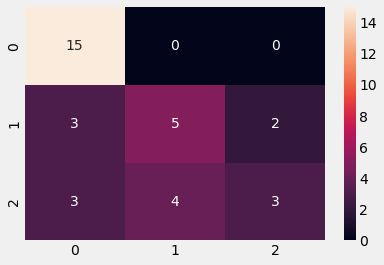

In [121]:
cm = confusion_matrix(test_labels, x_test_pred4)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 3  5  2]
 [ 3  4  3]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\2592114256.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

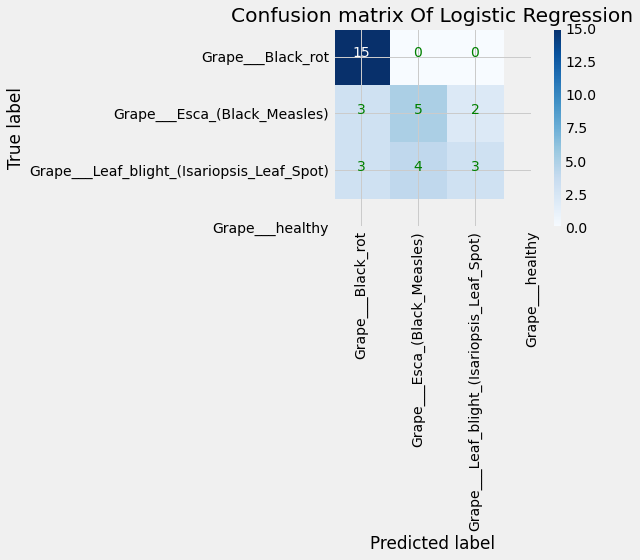

In [122]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred4)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of Logistic Regression')

1/1 [==============================] - 0s 88ms/step
The prediction for this image is:  ['Bacterial leaf blight']
The actual label for this image is:  Brown spot


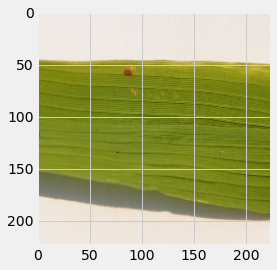

In [123]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = LR_1.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### 5.Ada Boost Classifier (ABC)

In [124]:
import datetime
start = datetime.datetime.now()

# Ada Boost Classifier (ABC)
from sklearn.ensemble import AdaBoostClassifier
ABC_1= AdaBoostClassifier(learning_rate= 0.01, n_estimators= 200, random_state=7)
# Train the model on training data
ABC_1.fit(x_train_new, y_train) #For sklearn no one hot encoding
end = datetime.datetime.now()
print("Total execution time : ", end-start)

Total execution time :  0:00:11.084236


In [125]:
#Now predict using the trained RF model. 
prediction_AB11 = ABC_1.predict(x_train_new)
#Inverse le transform to get original label back. 
prediction_AB11 = le.inverse_transform(prediction_AB11)

In [126]:
#Now predict using the trained ML model. 
x_test_pred5 = ABC_1.predict(x_test_new)

#Inverse le transform to get original label back. 
x_test_pred5 = le.inverse_transform(x_test_pred5)

In [127]:
print ("Test Accuracy of Ada Boost Classifier = ", metrics.accuracy_score(test_labels, x_test_pred5)*100)

Test Accuracy of Ada Boost Classifier =  54.285714285714285


In [128]:
print(classification_report(test_labels, x_test_pred5,digits=4))

                       precision    recall  f1-score   support

Bacterial leaf blight     0.7895    1.0000    0.8824        15
           Brown spot     0.3333    0.4000    0.3636        10
            Leaf smut     0.0000    0.0000    0.0000        10

             accuracy                         0.5429        35
            macro avg     0.3743    0.4667    0.4153        35
         weighted avg     0.4336    0.5429    0.4820        35



<AxesSubplot:>

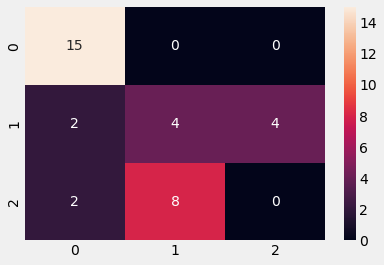

In [129]:
cm = confusion_matrix(test_labels, x_test_pred5)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 2  4  4]
 [ 2  8  0]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\1423505565.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

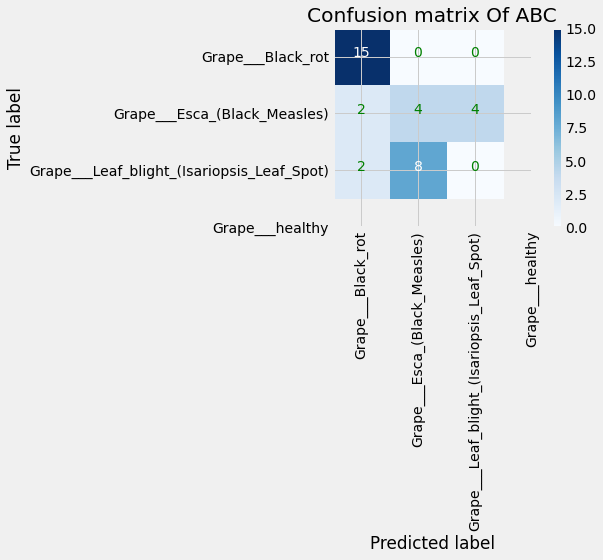

In [130]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred5)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of ABC')

1/1 [==============================] - 0s 94ms/step
The prediction for this image is:  ['Bacterial leaf blight']
The actual label for this image is:  Bacterial leaf blight


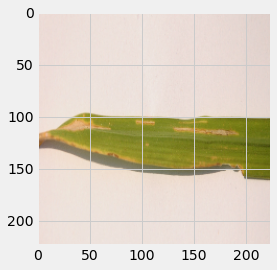

In [131]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = ABC_1.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### 6. KNN 

In [132]:
import datetime
start = datetime.datetime.now()

from sklearn.neighbors import KNeighborsClassifier

KNN1 = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 20, metric= 'minkowski', n_neighbors= 5, p= 2, weights= 'distance')
KNN1.fit(x_train_new,y_train)
end = datetime.datetime.now()
print("Total execution time : ", end-start)

Total execution time :  0:00:00.210251


In [133]:
prediction_KNN1 = KNN1.predict(x_train_new)
#Inverse le transform to get original label back. 
prediction_KNN1 = le.inverse_transform(prediction_KNN1)

In [134]:
#Now predict using the trained RF model. 
x_test_pred6 = KNN1.predict(x_test_new)
#Inverse le transform to get original label back. 
x_test_pred6 = le.inverse_transform(x_test_pred6)

In [135]:
from sklearn import metrics
print ("Train Accuracy of KNN = ", metrics.accuracy_score(train_labels, prediction_KNN1)*100)
print ("Test Accuracy of KNN = ", metrics.accuracy_score(test_labels, x_test_pred6)*100)

Train Accuracy of KNN =  100.0
Test Accuracy of KNN =  62.857142857142854


In [136]:
print("Correct Predictions are :",sum(test_labels== x_test_pred6))
print("In Correct Predictions are :",sum(test_labels != x_test_pred6))
print("Accuracy :",sum(test_labels== x_test_pred6)/len(x_test_pred6)*100)

Correct Predictions are : 22
In Correct Predictions are : 13
Accuracy : 62.857142857142854


In [137]:

print("Classification report of KNN : \n",classification_report(test_labels, x_test_pred6,digits=4))

Classification report of KNN : 
                        precision    recall  f1-score   support

Bacterial leaf blight     0.6250    1.0000    0.7692        15
           Brown spot     0.6667    0.4000    0.5000        10
            Leaf smut     0.6000    0.3000    0.4000        10

             accuracy                         0.6286        35
            macro avg     0.6306    0.5667    0.5564        35
         weighted avg     0.6298    0.6286    0.5868        35



<AxesSubplot:>

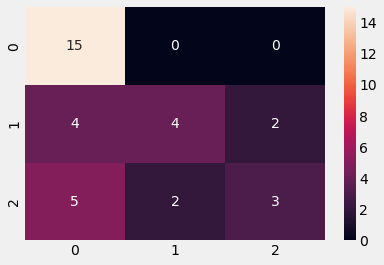

In [138]:
cm = confusion_matrix(test_labels, x_test_pred6)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 4  4  2]
 [ 5  2  3]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\3134397353.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

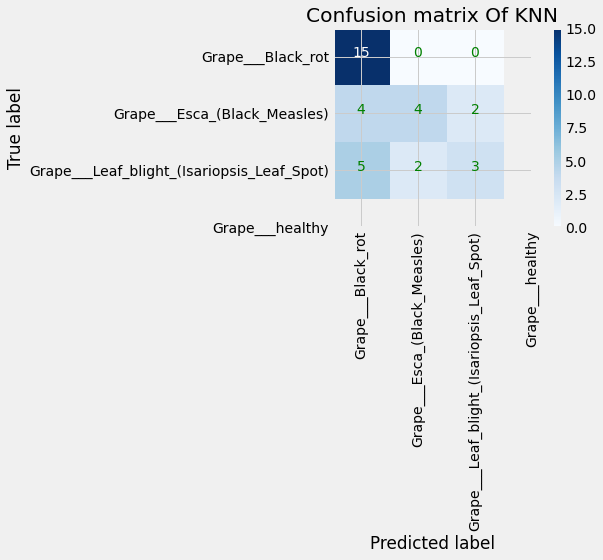

In [139]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred6)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of KNN')

1/1 [==============================] - 0s 92ms/step
The prediction for this image is:  ['Brown spot']
The actual label for this image is:  Brown spot


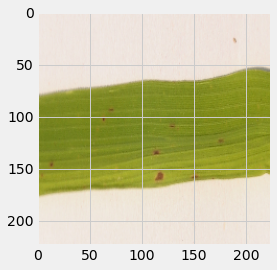

In [140]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = KNN1.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### 7) SVC 

In [141]:
import datetime
start = datetime.datetime.now()
#SVC
from sklearn.svm import SVC
SVC1=SVC(C= 10, gamma= 0.0001, kernel= 'rbf', probability=True)
# Train the model on training data
SVC1.fit(x_train_new, y_train)
end = datetime.datetime.now()
print("Total execution time : ", end-start)

Total execution time :  0:00:00.429664


In [142]:
#Now predict using the trained RF model. 
prediction_SV11 = SVC1.predict(x_train_new)
#Inverse le transform to get original label back. 
prediction_SV11 = le.inverse_transform(prediction_SV11)

In [143]:
#Now predict using the trained RF model. 
x_test_pred7 = SVC1.predict(x_test_new)
#Inverse le transform to get original label back. 
x_test_pred7 = le.inverse_transform(x_test_pred7)

In [144]:
print ("Train Accuracy of SVC = ", metrics.accuracy_score(train_labels, prediction_SV11)*100) 
print ("Accuracy of SVC = ", metrics.accuracy_score(test_labels, x_test_pred7)*100)

Train Accuracy of SVC =  100.0
Accuracy of SVC =  68.57142857142857


In [145]:
print("Correct Predictions are :",sum(test_labels== x_test_pred7))
print("In Correct Predictions are :",sum(test_labels != x_test_pred7))
print("Accuracy :",sum(test_labels== x_test_pred7)/len(x_test_pred7)*100)

Correct Predictions are : 24
In Correct Predictions are : 11
Accuracy : 68.57142857142857


In [146]:
print("Classification report of SVC : \n",classification_report(test_labels, x_test_pred7,digits=4))

Classification report of SVC : 
                        precision    recall  f1-score   support

Bacterial leaf blight     0.7143    1.0000    0.8333        15
           Brown spot     0.6250    0.5000    0.5556        10
            Leaf smut     0.6667    0.4000    0.5000        10

             accuracy                         0.6857        35
            macro avg     0.6687    0.6333    0.6296        35
         weighted avg     0.6752    0.6857    0.6587        35



<AxesSubplot:>

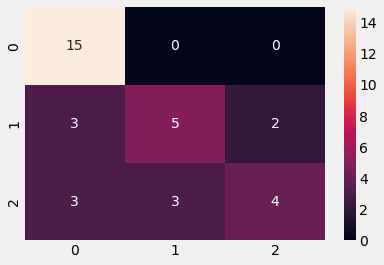

In [147]:
cm = confusion_matrix(test_labels, x_test_pred7)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 3  5  2]
 [ 3  3  4]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\1521116731.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

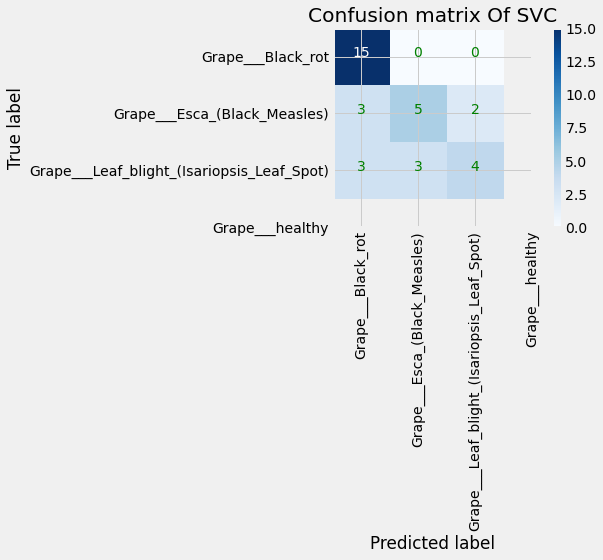

In [148]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred7)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of SVC')

1/1 [==============================] - 0s 79ms/step
The prediction for this image is:  ['Bacterial leaf blight']
The actual label for this image is:  Bacterial leaf blight


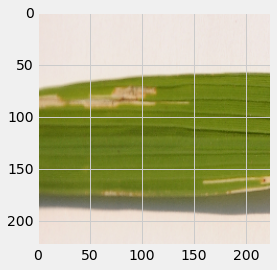

In [149]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = SVC1.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### 8) XGBOOST 

In [150]:
import datetime
start = datetime.datetime.now()
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train_new, y_train) #For sklearn no one hot encoding
end = datetime.datetime.now()
print("Total execution time : ", end-start)

Total execution time :  0:00:12.216759


In [151]:
#Now predict using the trained RF model. 
prediction_xb1 = xgb1.predict(x_train_new)
#Inverse le transform to get original label back. 
prediction_xb1 = le.inverse_transform(prediction_xb1)

In [152]:
#Now predict using the trained RF model. 
x_test_pred8 = xgb1.predict(x_test_new)
#Inverse le transform to get original label back. 
x_test_pred8 = le.inverse_transform(x_test_pred8)

In [153]:
print ("Train Accuracy of XGBoost = ", metrics.accuracy_score(train_labels, prediction_xb1)*100)
print ("Test Accuracy of XGBoost  = ", metrics.accuracy_score(test_labels, x_test_pred8)*100)

Train Accuracy of XGBoost =  100.0
Test Accuracy of XGBoost  =  62.857142857142854


In [154]:
print("Correct Predictions are :",sum(test_labels== x_test_pred8))
print("In Correct Predictions are :",sum(test_labels != x_test_pred8))
print("Accuracy :",sum(test_labels== x_test_pred8)/len(x_test_pred8)*100)

Correct Predictions are : 22
In Correct Predictions are : 13
Accuracy : 62.857142857142854


In [155]:
print("Classification report of XGBoost : \n",classification_report(test_labels, x_test_pred8,digits=4))

Classification report of XGBoost : 
                        precision    recall  f1-score   support

Bacterial leaf blight     0.7895    1.0000    0.8824        15
           Brown spot     0.4000    0.4000    0.4000        10
            Leaf smut     0.5000    0.3000    0.3750        10

             accuracy                         0.6286        35
            macro avg     0.5632    0.5667    0.5525        35
         weighted avg     0.5955    0.6286    0.5996        35



<AxesSubplot:>

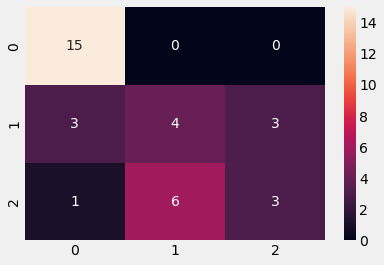

In [156]:
cm = confusion_matrix(test_labels, x_test_pred8)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 3  4  3]
 [ 1  6  3]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\1667483684.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

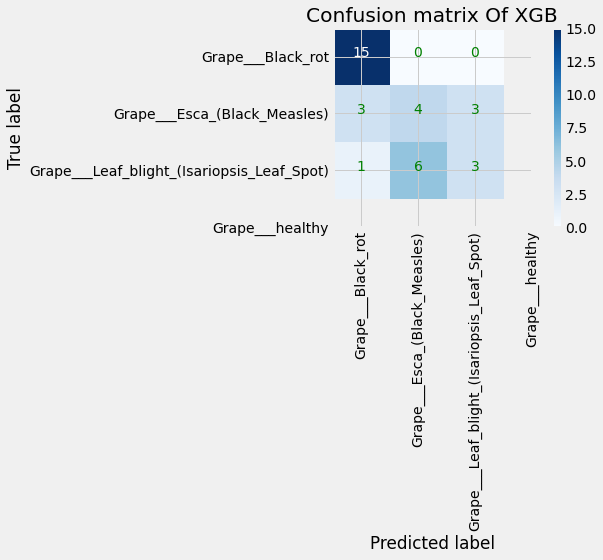

In [157]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, x_test_pred8)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of XGB')

1/1 [==============================] - 0s 94ms/step
The prediction for this image is:  ['Leaf smut']
The actual label for this image is:  Leaf smut


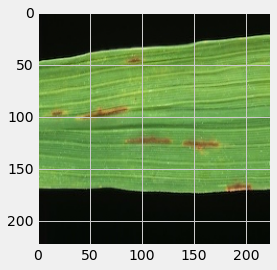

In [158]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = xgb1.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### Voting Classifier- 1- Combination of Three models (LR, SVC,LDA) on 1145 optimal features

### Voting- Hard

In [176]:
from sklearn.ensemble import VotingClassifier
voting_clf_1145 = VotingClassifier( estimators=[('xgb', xgb1), ('svc', SVC1),('dtc', DTC)], voting='hard')
import datetime
start = datetime.datetime.now()
voting_clf_1145.fit(x_train_new, y_train)
end = datetime.datetime.now()
print("Total execution time : ", end-start)

Total execution time :  0:00:12.797657


In [177]:
y_pred_train_vot=voting_clf_1145.predict(x_train_new)
y_pred_train_vot = le.inverse_transform(y_pred_train_vot)

In [178]:
y_pred_test_vot=voting_clf_1145.predict(x_test_new)
y_pred_test_vot = le.inverse_transform(y_pred_test_vot)

In [179]:
print ("Train Accuracy   = ", metrics.accuracy_score(train_labels, y_pred_train_vot)*100)
print ("Test Accuracy  = ", metrics.accuracy_score(test_labels, y_pred_test_vot)*100)

Train Accuracy   =  100.0
Test Accuracy  =  68.57142857142857


In [180]:
print("Correct Predictions are :",sum(test_labels== y_pred_test_vot))
print("In Correct Predictions are :",sum(test_labels != y_pred_test_vot))
print("Accuracy :",sum(test_labels==y_pred_test_vot)/len(y_pred_test_vot)*100)

Correct Predictions are : 24
In Correct Predictions are : 11
Accuracy : 68.57142857142857


In [181]:
print("Classification report of Hard-Voting : \n",classification_report(test_labels, y_pred_test_vot,digits=4))

Classification report of Hard-Voting : 
                        precision    recall  f1-score   support

Bacterial leaf blight     0.7895    1.0000    0.8824        15
           Brown spot     0.5556    0.5000    0.5263        10
            Leaf smut     0.5714    0.4000    0.4706        10

             accuracy                         0.6857        35
            macro avg     0.6388    0.6333    0.6264        35
         weighted avg     0.6603    0.6857    0.6630        35



<AxesSubplot:>

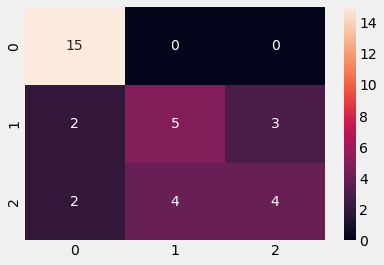

In [182]:
cm = confusion_matrix(test_labels, y_pred_test_vot)
#print(cm)
sns.heatmap(cm, annot=True)

Confusion matrix
[[15  0  0]
 [ 2  5  3]
 [ 2  4  4]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10420\2907204346.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

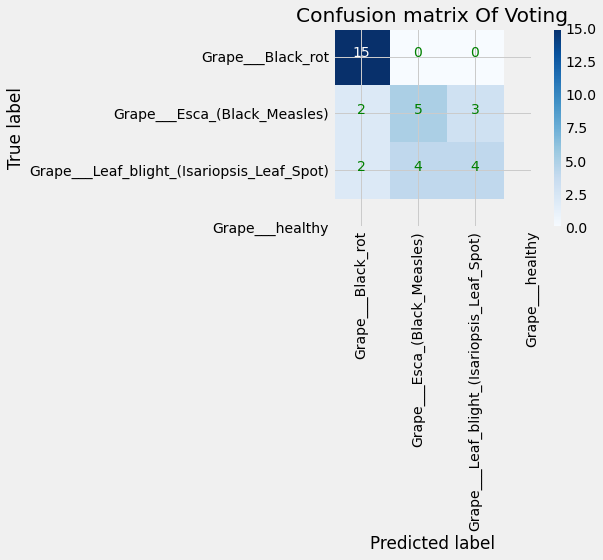

In [183]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,8))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, y_pred_test_vot)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                                           'Grape___healthy'
                                           ],
                      title='Confusion matrix Of Voting')

1/1 [==============================] - 0s 92ms/step
The prediction for this image is:  ['Leaf smut']
The actual label for this image is:  Leaf smut


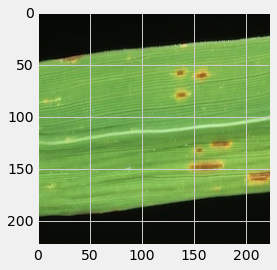

In [184]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = voting_clf_1145.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### Soft Voting

In [185]:
from sklearn.ensemble import VotingClassifier
voting_soft = VotingClassifier( estimators=[('xgb', xgb1), ('svc', SVC1),('dtc', DTC)], voting='soft')
import datetime
start = datetime.datetime.now()
voting_soft.fit(x_train_new, y_train)
end = datetime.datetime.now()
print("Total execution time : ", end-start)

Total execution time :  0:00:12.971240


In [186]:
y_pred_train_vot=voting_soft.predict(x_train_new)
y_pred_train_vot = le.inverse_transform(y_pred_train_vot)

In [187]:
y_pred_test_vot=voting_soft.predict(x_test_new)
y_pred_test_soft = le.inverse_transform(y_pred_test_vot)

In [188]:
print ("Train Accuracy   = ", metrics.accuracy_score(train_labels, y_pred_train_vot)*100)
print ("Test Accuracy  = ", metrics.accuracy_score(test_labels, y_pred_test_soft)*100)

Train Accuracy   =  100.0
Test Accuracy  =  65.71428571428571


In [189]:
print("Correct Predictions are :",sum(test_labels== y_pred_test_soft))
print("In Correct Predictions are :",sum(test_labels != y_pred_test_soft))
print("Accuracy :",sum(test_labels==y_pred_test_soft)/len(y_pred_test_soft)*100)

Correct Predictions are : 23
In Correct Predictions are : 12
Accuracy : 65.71428571428571


In [190]:
print("Classification report of Soft-Voting : \n",classification_report(test_labels, y_pred_test_soft,digits=4))

Classification report of Soft-Voting : 
                        precision    recall  f1-score   support

Bacterial leaf blight     0.8333    1.0000    0.9091        15
           Brown spot     0.4545    0.5000    0.4762        10
            Leaf smut     0.5000    0.3000    0.3750        10

             accuracy                         0.6571        35
            macro avg     0.5960    0.6000    0.5868        35
         weighted avg     0.6299    0.6571    0.6328        35



<AxesSubplot:>

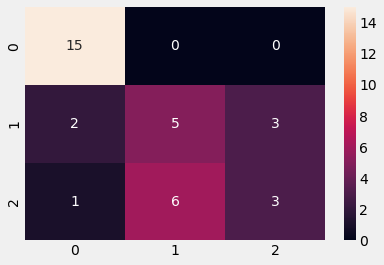

In [191]:
cm = confusion_matrix(test_labels, y_pred_test_soft)
#print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 87ms/step
The prediction for this image is:  ['Brown spot']
The actual label for this image is:  Brown spot


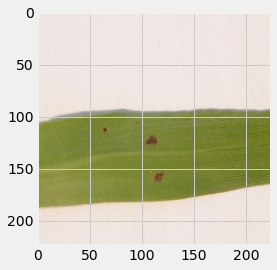

In [192]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = voting_soft.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### END